# EDA

### ***Song embeddings*** 

In [ ]:
import pandas as pd

# Load the Parquet file
df = pd.read_parquet(r'C:\Users\User\OneDrive\PycharmProjects\Recommendation systems\Project\semi_perso_user_cold_start\data\song_embeddings.parquet')
# Print the first song
print(df.iloc[20])

song_index                                                     20
features_svd    [0.0012714517536423758, -0.0004260496751141059...
features_mf     [0.23726330697536469, -0.35738933086395264, 1....
Name: 20, dtype: object


### ***User embeddings***

In [ ]:
import pandas as pd
''' A user embedding is represented by all the song embeddings of the songs that the user has listened to.'''
# Load the Parquet file
df_user_embeddings = pd.read_parquet(r'C:\Users\User\OneDrive\PycharmProjects\Recommendation systems\Project\semi_perso_user_cold_start\data\user_embeddings.parquet')
# Print the first song
print(df_user_embeddings.iloc[0])

user_index                                                        0
svd_embeddings    [0.003035474382500339, 0.0016562607178209066, ...
mf_embeddings     [-0.007133339563321673, -0.003685796285506314,...
Name: 0, dtype: object


In [ ]:
df_user_embeddings.shape


(70000, 3)

### ***User features***

### The shape of the user features is 2579 columns on 70000 rows. It contains all the input features for the user, demographic features, and interaction features.

In [6]:
import pandas as pd

# Load the Parquet file
df = pd.read_parquet(r'C:\Users\User\OneDrive\PycharmProjects\Recommendation systems\Project\semi_perso_user_cold_start\data\user_features_train_svd.parquet')
# Print the first song
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
    print(df.iloc[10])

user_index                                                                           2719
d1d30_songs                             [47618, 15439, 4165, 33226, 36152, 39314, 3769...
age_embedding0                                                                   0.000743
age_embedding1                                                                   0.000649
age_embedding2                                                                  -0.001582
age_embedding3                                                                  -0.004294
age_embedding4                                                                   0.012286
age_embedding5                                                                  -0.043465
age_embedding6                                                                   0.036981
age_embedding7                                                                   0.063809
age_embedding8                                                                  -0.014853
age_embedd

### ***Age distribution of users***

age_value
-1      10054
 1          1
 3          1
 4          1
 7          3
        ...  
 114        1
 115        7
 116        1
 119       18
 120       35
Name: count, Length: 108, dtype: int64


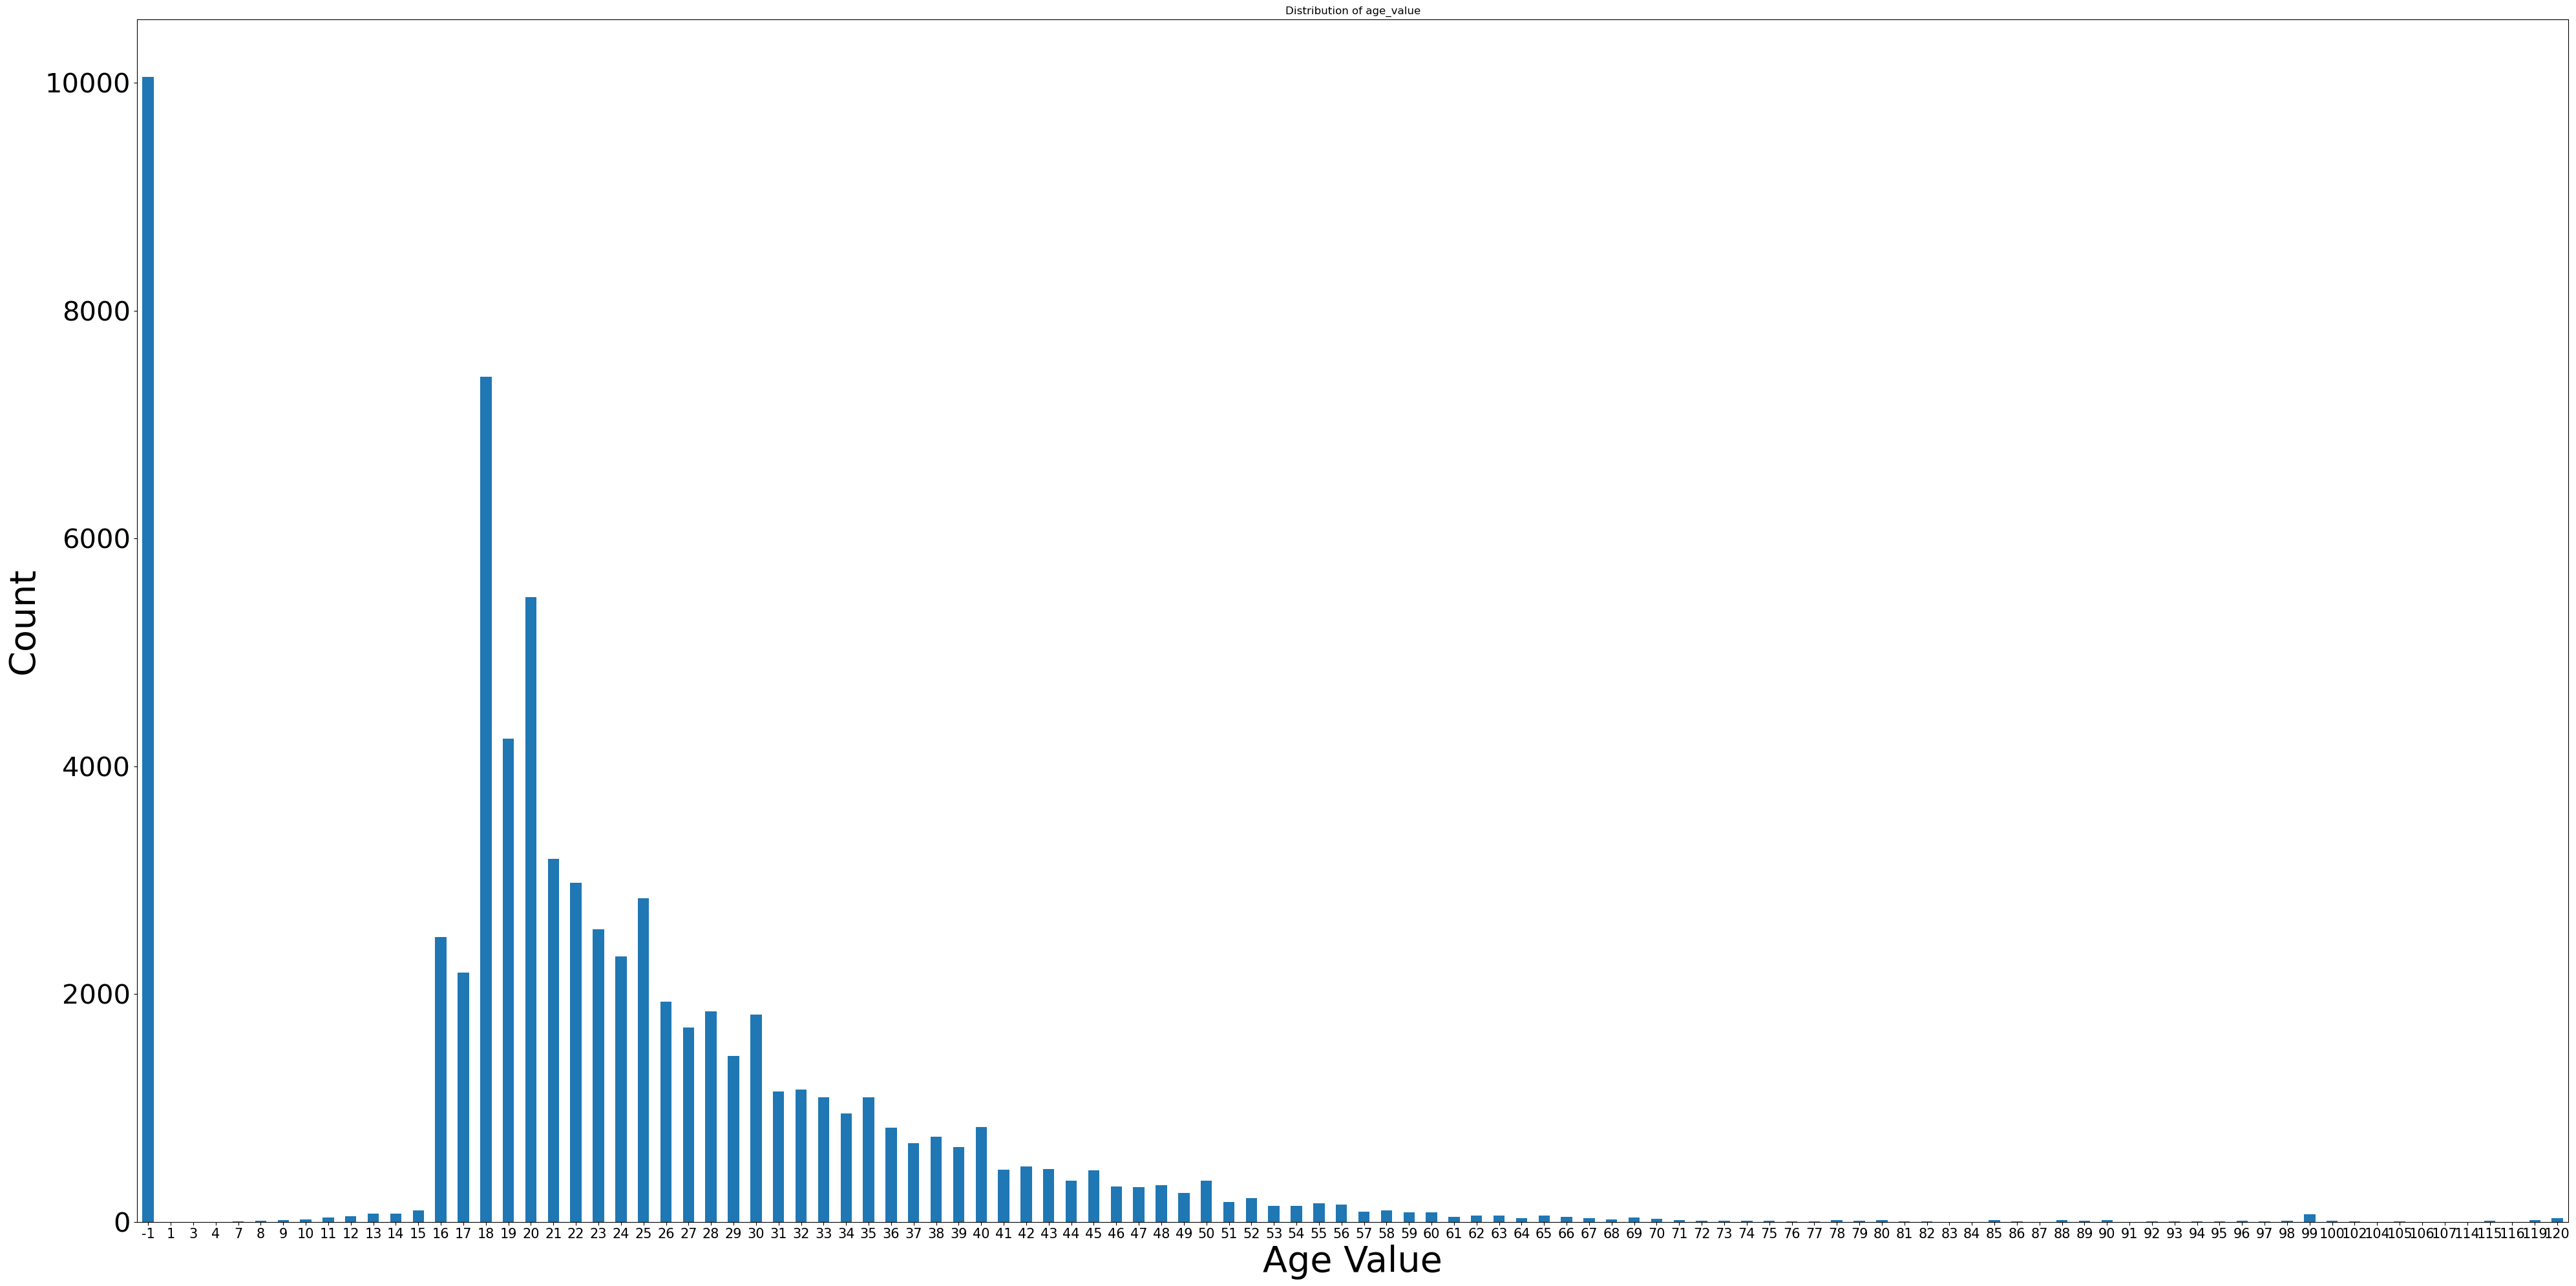

In [ ]:
# Print the distribution of the 'age_value' column
print(df['age_value'].value_counts().sort_index())

# Plot the distribution of the 'age_value' column
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))
ax = df['age_value'].value_counts().sort_index().plot(kind='bar')

# Resize y-axis and x-axis tick labels
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=15)

plt.xlabel('Age Value', fontsize=40)
plt.ylabel('Count', fontsize=40)
plt.title('Distribution of age_value')
plt.xticks(rotation=0)  # Make x-axis labels horizontal for readability
plt.tight_layout()
plt.show()


In [ ]:
df_age_18 = df[df['age_value'] == 18]
print(f"Number of users with age 18: {df_age_18.shape[0]}")

Number of users with age 18: 7420


In [ ]:
# …existing code…
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])
# convert nan to 0
df.fillna(0, inplace=True)


Missing values in each column:
nb_favorite_songs             44598
nb_favorite_albums            59163
nb_favorite_artists           12134
nb_favorite_playlists         57831
nb_skipped_songs              28229
nb_skipped_artists            28229
nb_skipped_albums             28229
nb_banned_songs               69376
nb_banned_artists             69376
nb_banned_albums              69376
nb_streamed_songs             14988
nb_streamed_artists           14988
nb_streamed_albums            14988
nb_search_songs               47646
nb_search_albums              51657
nb_search_artists             36050
nb_search_playlists           50683
nb_onboarding_like_artists    12435
dtype: int64


In [ ]:
# printing columns that have only zeros (numeric columns only)
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]):
        zero_count = (df[col] == 0).sum()
        print(f"{col}: {zero_count} zeros")
# …existing code…

user_index: 1 zeros
age_embedding0: 0 zeros
age_embedding1: 0 zeros
age_embedding2: 0 zeros
age_embedding3: 0 zeros
age_embedding4: 0 zeros
age_embedding5: 0 zeros
age_embedding6: 0 zeros
age_embedding7: 0 zeros
age_embedding8: 0 zeros
age_embedding9: 0 zeros
age_embedding10: 0 zeros
age_embedding11: 0 zeros
age_embedding12: 0 zeros
age_embedding13: 0 zeros
age_embedding14: 0 zeros
age_embedding15: 0 zeros
age_embedding16: 0 zeros
age_embedding17: 0 zeros
age_embedding18: 0 zeros
age_embedding19: 0 zeros
age_embedding20: 0 zeros
age_embedding21: 0 zeros
age_embedding22: 0 zeros
age_embedding23: 0 zeros
age_embedding24: 0 zeros
age_embedding25: 0 zeros
age_embedding26: 0 zeros
age_embedding27: 0 zeros
age_embedding28: 0 zeros
age_embedding29: 0 zeros
age_embedding30: 0 zeros
age_embedding31: 0 zeros
age_embedding32: 0 zeros
age_embedding33: 0 zeros
age_embedding34: 0 zeros
age_embedding35: 0 zeros
age_embedding36: 0 zeros
age_embedding37: 0 zeros
age_embedding38: 0 zeros
age_embedding39

C:\Users\User\AppData\Local\Temp\ipykernel_73056\3617349683.py:59: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\User\anaconda3\envs\Cyber\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


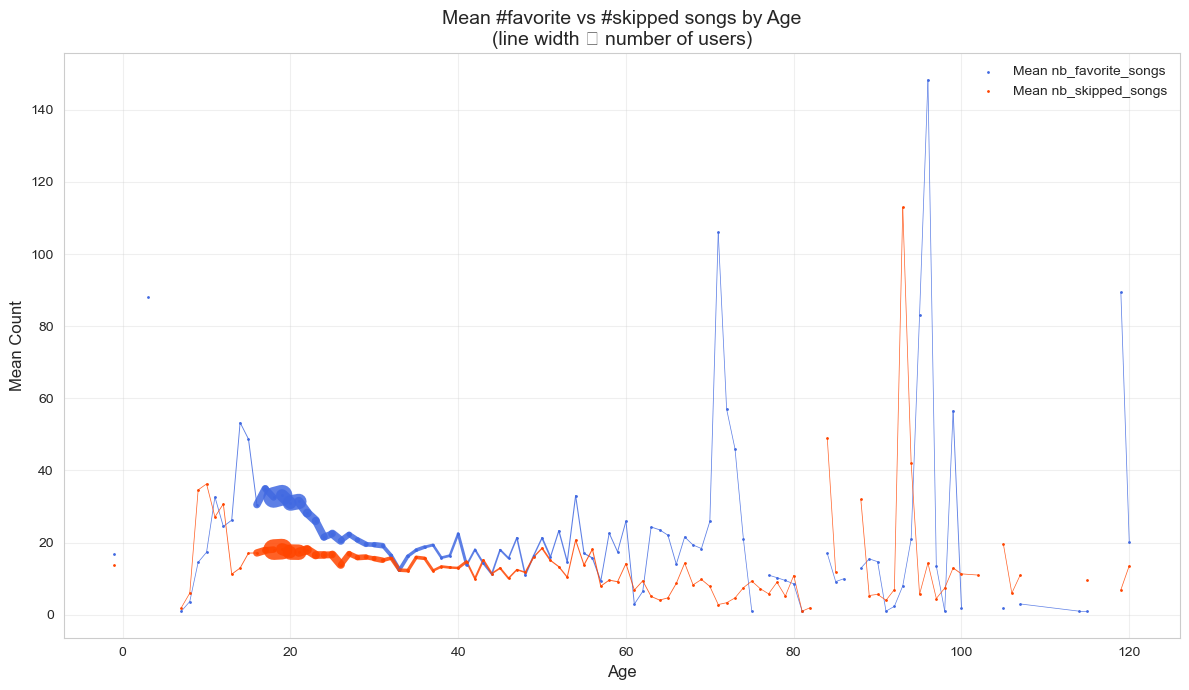

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ─────────────────────────
# 1.  Aggregate data
# ─────────────────────────
mean_by_age = (
    df.groupby("age_value")[["nb_favorite_songs", "nb_skipped_songs"]]
      .mean()
)
user_counts = (
    df["age_value"].value_counts()
      .sort_index()
      .reindex(mean_by_age.index)        # ensure same index order
      .fillna(0)
)

ages       = mean_by_age.index.to_numpy()
fav_songs  = mean_by_age["nb_favorite_songs"].to_numpy()
skip_songs = mean_by_age["nb_skipped_songs"].to_numpy()
counts     = user_counts.to_numpy()

# ─────────────────────────
# 2.  Map counts → widths
# ─────────────────────────
min_w, max_w = 0.5, 20                     # tweak if you want thinner / thicker extremes
widths = min_w + (counts - counts.min()) / (counts.max() - counts.min()) * (max_w - min_w)

# ─────────────────────────
# 3.  Plot segment-by-segment
# ─────────────────────────
plt.figure(figsize=(12, 7))

for i in range(len(ages) - 1):
    # favourite songs line segment
    plt.plot([ages[i], ages[i+1]], [fav_songs[i], fav_songs[i+1]],
             color='royalblue', linewidth=widths[i], alpha=0.85)
    
    # skipped songs line segment
    plt.plot([ages[i], ages[i+1]], [skip_songs[i], skip_songs[i+1]],
             color='orangered', linewidth=widths[i], alpha=0.85)

# add markers at the nodes (optional)
plt.scatter(ages, fav_songs,  s=1, color='royalblue',  zorder=3, label='Mean nb_favorite_songs')
plt.scatter(ages, skip_songs, s=1, color='orangered', zorder=3, label='Mean nb_skipped_songs')

# ─────────────────────────
# 4.  Cosmetics
# ─────────────────────────
plt.xlabel('Age', fontsize=12)
plt.ylabel('Mean Count', fontsize=12)
plt.title('Mean #favorite vs #skipped songs by Age\n(line width ∝ number of users)',
          fontsize=14)
plt.grid(True, alpha=0.3)

# show only the colour legend (line-width is self-explanatory on the plot)
plt.legend(frameon=False)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the Parquet file
df_user_features_test_svd = pd.read_parquet(r'C:\Users\User\OneDrive\PycharmProjects\Recommendation systems\Project\semi_perso_user_cold_start\data\user_features_test_svd.parquet')
# Print the first song
print(df_user_features_test_svd.iloc[0])

df_user_features_train_svd = pd.read_parquet(r'C:\Users\User\OneDrive\PycharmProjects\Recommendation systems\Project\semi_perso_user_cold_start\data\user_features_train_svd.parquet')
# Print the first song
print(df_user_features_train_svd.iloc[0])

user_index                                                                90064
d1d30_songs                   [7757, 5174, 3686, 37128, 26271, 625, 19289, 6...
age_embedding0                                                         0.001291
age_embedding1                                                         0.001132
age_embedding2                                                        -0.002834
                                                    ...                        
nb_search_songs                                                             NaN
nb_search_albums                                                            NaN
nb_search_artists                                                           1.0
nb_search_playlists                                                         NaN
nb_onboarding_like_artists                                                  4.0
Name: 0, Length: 2581, dtype: object
user_index                                                                  654
d1d

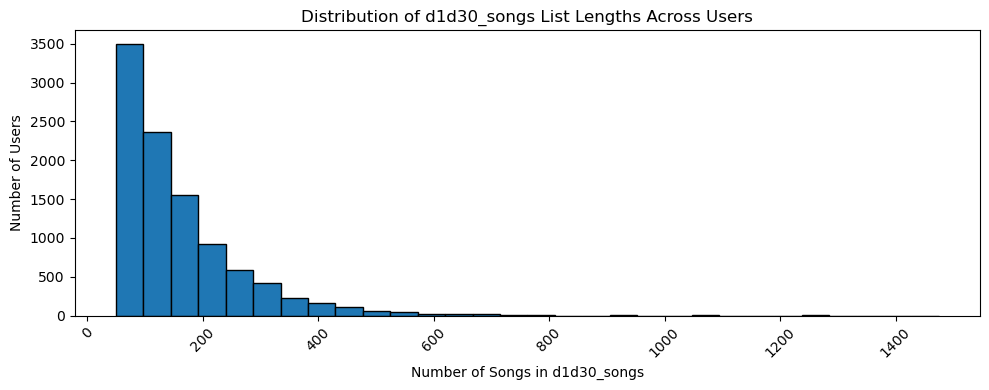

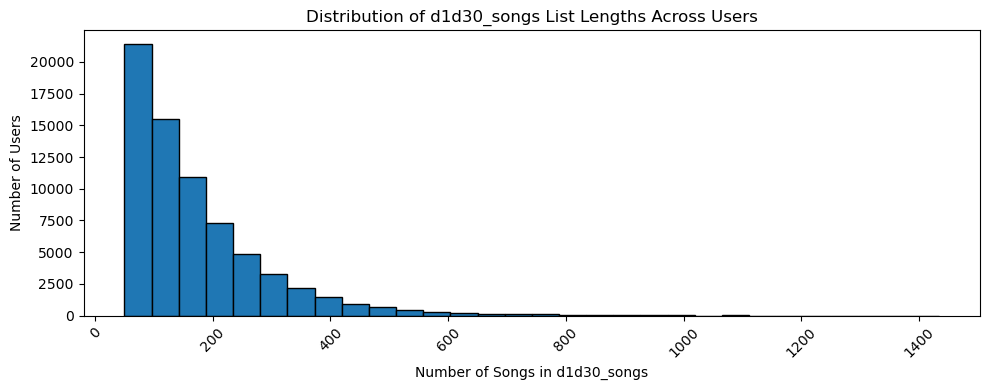

In [5]:
# Print statistics of the length of each list in 'd1d30_songs'
list_lengths_test = df_user_features_test_svd['d1d30_songs'].apply(len)

# Plot histogram with bins on the x-axis and readable x-tick labels
plt.figure(figsize=(10, 4))
plt.hist(list_lengths_test, bins=30, edgecolor='black')
plt.xlabel('Number of Songs in d1d30_songs')
plt.ylabel('Number of Users')
plt.title('Distribution of d1d30_songs List Lengths Across Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

list_lengths_train = df_user_features_train_svd['d1d30_songs'].apply(len)

# Plot histogram with bins on the x-axis and readable x-tick labels
plt.figure(figsize=(10, 4))
plt.hist(list_lengths_train, bins=30, edgecolor='black')
plt.xlabel('Number of Songs in d1d30_songs')
plt.ylabel('Number of Users')
plt.title('Distribution of d1d30_songs List Lengths Across Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Cold Start User Recommendation - Current solution

In [1]:
import sys
sys.path.insert(0, "/home/mickaelz/Recommendation systems/project")
# from data_generation import generate

In [2]:
import os
from data_generation import generate
from model_training import training
from model_evaluation import evaluation
from clustering import train_kmeans, train_inputfeatureskmeans
from options import config
from fuzzy_clustering import train_fuzzy_kmeans
from evaluation_fuzzy_only_on_cold import evaluation_with_fuzzy_on_cold
import warnings

import time
import pandas as pd
import torch


In [8]:
import torch
# prnt cuda device if there is
if torch.cuda.is_available():
    print("CUDA is available. Using GPU.")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Using CPU.")
    device = torch.device("cpu")

CUDA is available. Using GPU.


In [3]:

try:
    pd.io.parquet.get_engine('fastparquet')
except ImportError as e:
    print("please install fastparquet first")

if config['use_cuda'] and not torch.cuda.is_available():
    print("please make cuda gpu available, or set use_cuda=False")
    assert torch.cuda.is_available()

master_path= "/home/mickaelz/Recommendation systems/project/deezer"
dataset_path = "/home/mickaelz/Recommendation systems/project/data"
embeddings_version = config["embeddings_version"]
model_filename = "regression_model_" + embeddings_version
clustering_path = "clustering_" + embeddings_version
clusters_filename = "clustering_model" + embeddings_version
fuzzy_clustering_path = "fuzzy_clustering_" + embeddings_version
fuzzy_clusters_filename = "fuzzy_clustering_model" + embeddings_version
inputfeaturesclustering_path = "inputfeaturesclustering_" + embeddings_version
inputfeaturesclusters_filename = "inputfeaturesclustering_model" + embeddings_version
print("--- running for embeddings version " + embeddings_version + " ---")

--- running for embeddings version svd ---


## Generating Data
### The function "generate" reads song and user embeddings and features from parquet files, constructs train/validation/test splits, and saves per-user feature and label pairs as pickled PyTorch tensors for downstream recommendation model training and evaluation.

In [ ]:
import os
import pandas as pd
import torch
import torch.nn
import pickle
from options import dataset_eval

def generate(dataset_path, master_path, embeddings_version):

    #songs

    print("--- songs data ---")

    song_embeddings_path = dataset_path + "/song_embeddings.parquet"
    song_embeddings = pd.read_parquet(song_embeddings_path, engine = 'fastparquet')

    if not os.path.exists(master_path+"/m_song_dict.pkl"):
        song_dict = {}
        for idx, row in song_embeddings.iterrows():
            song_dict[row['song_index']] = idx
        pickle.dump(song_dict, open("{}/m_song_dict.pkl".format(master_path), "wb"))
    else:
        song_dict = pickle.load(open("{}/m_song_dict.pkl".format(master_path), "rb"))


    # user embeddings (target = only for train users)

    print("--- user embeddings - training dataset ---")

    user_embeddings = pd.read_parquet(dataset_path + "/user_embeddings.parquet", engine = 'fastparquet')
    list_embeddings = ["embedding_"+str(i) for i in range(len(user_embeddings[embeddings_version + "_embeddings"][0]))]
    user_embeddings[list_embeddings] = pd.DataFrame(user_embeddings[embeddings_version + "_embeddings"].tolist(), index= user_embeddings.index)

    # user features train

    print("--- user features - training dataset ---")

    features_train_path = dataset_path + "/user_features_train_" + embeddings_version + ".parquet"
    features_train = pd.read_parquet(features_train_path, engine = 'fastparquet').fillna(0)
    features_train = features_train.sort_values("user_index")
    features_train = features_train.reset_index(drop=True)#to check it is ok for train data

    # training dataset creation

    dataset = "train"
    if not os.path.exists(master_path+"/"):
        os.mkdir(master_path+"/")
    if not os.path.exists(master_path+"/"+embeddings_version+"/"):
        os.mkdir(master_path+"/"+embeddings_version+"/")
    if not os.path.exists(master_path+"/"+embeddings_version+"/"+dataset+"/"):
        os.mkdir(master_path+"/"+embeddings_version+"/"+dataset+"/")
    for idx in range(len(features_train)):
        x_train = torch.FloatTensor(features_train.iloc[idx,2:])
        y_train = torch.FloatTensor(user_embeddings[list_embeddings].iloc[idx,:])
        pickle.dump(x_train, open("{}/{}/{}/x_train_{}.pkl".format(master_path, embeddings_version, dataset, idx), "wb"))
        pickle.dump(y_train, open("{}/{}/{}/y_train_{}.pkl".format(master_path, embeddings_version, dataset, idx), "wb"))

    # user features validation & test

    print("--- user features - evaluation datasets ---")

    for dataset in dataset_eval :

        print("--- "+dataset+" ---")

        features_validation_path = dataset_path + "/user_features_" + dataset + "_" + embeddings_version + ".parquet"
        features_validation = pd.read_parquet(features_validation_path, engine = 'fastparquet').fillna(0)
        features_validation = features_validation.sort_values("user_index")
        features_validation = features_validation.reset_index(drop=True)

        # validation & test dataset creation

        if not os.path.exists(master_path+"/"+embeddings_version+"/"):
            os.mkdir(master_path+"/"+embeddings_version+"/")
        if not os.path.exists(master_path+"/"+embeddings_version+"/"+dataset+"/"):
            os.mkdir(master_path+"/"+embeddings_version+"/"+dataset+"/")
        for i in range(len(features_validation)):
            x_validation = torch.FloatTensor(features_validation.iloc[i,2:])
            y_validation = [song_dict[song_index]  for song_index in features_validation["d1d30_songs"][i]]
            groundtruth_validation_list = [1.0 * (song in y_validation) for song in range(len(song_embeddings))]
            pickle.dump(x_validation, open("{}/{}/{}/x_{}.pkl".format(master_path, embeddings_version, dataset, i), "wb"))
            pickle.dump(y_validation, open("{}/{}/{}/y_listened_songs_{}.pkl".format(master_path, embeddings_version, dataset, i), "wb"))
            pickle.dump(groundtruth_validation_list, open("{}/{}/{}/groundtruth_list_{}.pkl".format(master_path, embeddings_version, dataset, i), "wb"))


if not os.path.exists("{}/".format(master_path)):
    os.mkdir("{}/".format(master_path))
if not os.path.exists(master_path + "/" + embeddings_version + "/"):
    print("--- the data has not been generated yet for the embeddings version " + embeddings_version + " : generation running ---")
    os.mkdir(master_path + "/" + embeddings_version + "/")
    # preparing dataset
    print("--- data generation ---")
    start_time_data_generation = time.time()

    generate(dataset_path, master_path, config['embeddings_version'])
    
    print("--- data generation done ---")
    print("--- seconds ---" + str(time.time() - start_time_data_generation))
else:
    print("--- the data has already been generated : no need to regenerate it ---")

## Training the model
### The function "train" reads the pickled PyTorch tensors, constructs a DataLoader for batching, and trains a recommendation model using the specified hyperparameters. It saves the trained model to disk and evaluates its performance on the validation set.

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn

class RegressionTripleHidden(torch.nn.Module):
    def __init__(self, input_dim, output_dim, first_hidden_dim = 400, second_hidden_dim = 300, third_hidden_dim = 200, drop_out = 0):
        super(RegressionTripleHidden, self).__init__()
        self.input_dim = input_dim
        self.first_hidden_dim  = first_hidden_dim
        self.second_hidden_dim  = second_hidden_dim
        self.third_hidden_dim  = third_hidden_dim
        self.output_dim = output_dim
        self.dpin = torch.nn.Dropout(drop_out)

        self.fc1 = torch.nn.Linear(self.input_dim, self.first_hidden_dim)
        self.fc1_bn = torch.nn.BatchNorm1d(self.first_hidden_dim)

        self.fc2 = torch.nn.Linear(self.first_hidden_dim, self.second_hidden_dim)
        self.fc2_bn = torch.nn.BatchNorm1d(self.second_hidden_dim)

        self.fc3 = torch.nn.Linear(self.second_hidden_dim, self.third_hidden_dim)
        self.fc3_bn = torch.nn.BatchNorm1d(self.third_hidden_dim)

        self.fc4 = torch.nn.Linear(self.third_hidden_dim, self.output_dim)

    def forward(self, x):
        hidden1 = self.fc1_bn(F.relu((self.fc1(self.dpin(x)))))
        hidden2 = self.fc2_bn(F.relu(self.fc2(hidden1)))
        hidden3 = self.fc3_bn(F.relu(self.fc3(hidden2)))
        output = F.normalize(self.fc4(hidden3), dim = 1)
        return output

In [ ]:

def training(dataset_path: str, master_path: str, *, embeddings_version: str = "svd", save_model: bool = True, model_filename: str | None = None):
    # hyper‑params
    use_cuda   = config["use_cuda"]
    device     = torch.device(config["device_number"]) if use_cuda else torch.device("cpu")
    n_epochs   = config["nb_epochs"]
    bs         = config["batch_size"]
    lr         = config["learning_rate"]
    reg        = config["reg_param"]
    dropout    = config["drop_out"]
    eval_every = config["eval_every"]

    if model_filename is None:
        model_filename = f"regression_{embeddings_version}"
    model_path = os.path.join(master_path, model_filename + ".pt")

    # dirs
    master_path =  "/home/mickaelz/Recommendation systems/project/deezer"
    print(f"Master path: {master_path}")

    train_dir = os.path.join(master_path, embeddings_version, "train")
    val_dir   = os.path.join(master_path, embeddings_version, "validation")

    train_shard = _build_shard(train_dir, embeddings_version, train=True)
    val_shard   = _build_shard(val_dir,   embeddings_version, train=False)

    train_loader = DataLoader(TensorDataset(train_shard["x"], train_shard["y"]), bs, shuffle=True, num_workers=4, pin_memory=use_cuda)
    val_loader   = DataLoader(TensorDataset(val_shard["x"],   val_shard["y"]),   bs, shuffle=False, num_workers=4, pin_memory=use_cuda)

    model = RegressionTripleHidden(config["input_dim"], config["embeddings_dim"], drop_out=dropout)
    # model = EmbeddingRegressor128().to(device)
    # opt   = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

    if use_cuda:
        model = model.to(device)

    criterion = torch.nn.MSELoss()
    # cosine alignment loss
    # criterion = nn.CosineEmbeddingLoss(margin=0.0)
    optim     = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=reg)

    for epoch in range(n_epochs):
        # ---- train ----
        model.train(); t0 = time.time(); losses = []
        for xb, yb in train_loader:
            xb, yb = xb.to(device),  F.normalize(yb.to(device), dim=1)
            optim.zero_grad()
            pred = model(xb)
            # loss = criterion(pred, yb, torch.ones(xb.size(0),device=device))
            loss = criterion(pred, yb)
            
            # Print a sample prediction and its target
            if epoch == n_epochs-2:
                print("Sample model output:", pred[0].detach().cpu().numpy())
                print("Sample target y:", yb[0].detach().cpu().numpy())
            loss.backward()
            optim.step()
            losses.append(loss.item())
        print(f"Epoch {epoch:02d}  train‑MSE {np.mean(losses):.5f}  [{time.time()-t0:.1f}s]")

       # ---- validate ----
        if (epoch + 1) % eval_every == 0 or epoch == n_epochs - 1:
            model.eval()
            vloss = []
            with torch.no_grad():
                for xb, yb in val_loader:
                    xb = xb.to(device, non_blocking=True)
                    yb = yb.to(device, non_blocking=True)

                    # normalise only when yb is already a float embedding
                    if yb.dtype.is_floating_point:
                        yb = F.normalize(yb, dim=1)
                    else:
                        yb = yb.float()            # cast ID tensor to float so loss works

                    loss = criterion(model(xb),
                                    yb)
                    vloss.append(loss.item())

            print(f"  val‑loss {np.mean(vloss):.5f}")


    if save_model:
        torch.save(model.state_dict(), model_path)
        print(f"Saved model → {model_path}")


In [11]:
''' training model. '''
print("--- training prediction model ---")
start_time_prediction_model = time.time()
training(dataset_path, master_path, embeddings_version = embeddings_version, save_model = True, model_filename = model_filename)
print("--- training prediction model done ---")
print("--- seconds ---" + str(time.time() - start_time_prediction_model))

--- training prediction model ---
Master path: /home/mickaelz/Recommendation systems/project/deezer
⋯ Building shard /home/mickaelz/Recommendation systems/project/deezer/svd/train/svd_train_shard.pt
⋯ Loading shard /home/mickaelz/Recommendation systems/project/deezer/svd/train/svd_train_shard.pt
⋯ Building shard /home/mickaelz/Recommendation systems/project/deezer/svd/validation/svd_validation_shard.pt
⋯ Loading shard /home/mickaelz/Recommendation systems/project/deezer/svd/validation/svd_validation_shard.pt
Epoch 00  train‑MSE 0.01013  [45.9s]
Epoch 01  train‑MSE 0.00574  [0.6s]
Epoch 02  train‑MSE 0.00452  [0.6s]
Epoch 03  train‑MSE 0.00399  [0.6s]
Epoch 04  train‑MSE 0.00372  [0.6s]
Epoch 05  train‑MSE 0.00356  [0.6s]
Epoch 06  train‑MSE 0.00343  [0.6s]
Epoch 07  train‑MSE 0.00331  [0.6s]
Epoch 08  train‑MSE 0.00326  [0.6s]
Epoch 09  train‑MSE 0.00318  [0.6s]
  val‑loss 273357850.80000
Epoch 10  train‑MSE 0.00315  [0.6s]
Epoch 11  train‑MSE 0.00313  [0.6s]
Epoch 12  train‑MSE 0.0030

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import pickle
from options import config
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def train_kmeans(dataset_path, master_path, clustering_path, nb_clusters, max_iter, random_state, 
                 embeddings_version="svd", clusters_filename=None):
    # Set default filename if not provided
    if clusters_filename is None:
        clusters_filename = "kmeans_model_embeddings.pkl"

    # ---------------------------
    # 1. Load User Embeddings
    # ---------------------------
    user_embeddings = pd.read_parquet(os.path.join(dataset_path, "user_embeddings.parquet"), engine='fastparquet')
    # Expand the embeddings list into individual columns
    list_embeddings = ["embedding_" + str(i) for i in range(len(user_embeddings[embeddings_version + "_embeddings"].iloc[0]))]
    user_embeddings[list_embeddings] = pd.DataFrame(user_embeddings[embeddings_version + "_embeddings"].tolist(),
                                                    index=user_embeddings.index)
    user_embeddings_values = user_embeddings[list_embeddings].values

    # ---------------------------
    # 2. Run KMeans Clustering
    # ---------------------------

    '''-- Evaluate cluster sizes for optimal number using inertia --'''
    eval_results = []
    eval_model_dir = os.path.join(master_path, clustering_path)
    os.makedirs(eval_model_dir, exist_ok=True)
    for k in range(500, 2001, 100):
        km_tmp = KMeans(n_clusters=k,
                        random_state=random_state,
                        max_iter=max_iter,
                        algorithm='lloyd',
                        n_init='auto')
        km_tmp.fit(user_embeddings_values)
        eval_results.append({"n_clusters": k, "inertia": km_tmp.inertia_})
    eval_df = pd.DataFrame(eval_results)
    eval_dir = os.path.join(eval_model_dir, "evaluation")
    os.makedirs(eval_dir, exist_ok=True)
    eval_df.to_csv(os.path.join(eval_dir, "clusters_evaluation.csv"), index=False)
    print(f"Cluster evaluation saved to {os.path.join(eval_dir, 'clusters_evaluation.csv')}")

    # -- Automatic elbow detection --
    ks = eval_df['n_clusters'].tolist()
    inertias = eval_df['inertia'].tolist()
    try:
        from kneed import KneeLocator
        knee = KneeLocator(ks, inertias,
                           curve='convex',
                           direction='decreasing').knee
        optimal_k = int(knee or nb_clusters)
    except ImportError:
        print("kneed not installed, falling back to nb_clusters")
        optimal_k = nb_clusters


    # ---------------------------
    # 3. Assign Clusters and Prepare Song Aggregation
    # ---------------------------
    user_embeddings["cluster"] = kmeans.labels_
    user_clusters = user_embeddings[["user_index", "cluster"]]

    # Load training user features (songs listened D1-D30)
    features_train_path = os.path.join(dataset_path, "user_features_train_" + embeddings_version + ".parquet")
    features_train = pd.read_parquet(features_train_path, engine='fastparquet').fillna(0)
    features_train = features_train.sort_values("user_index").reset_index(drop=True)

    # Merge user clusters with song lists
    listd1d30 = pd.merge(features_train[["user_index", "d1d30_songs"]], user_clusters, on="user_index", how="left")
    listd1d30_exploded = listd1d30.explode('d1d30_songs')
    listd1d30_exploded["count"] = 1  # each occurrence counts as 1

    # Group by cluster and song to get counts
    listd1d30_by_cluster = pd.DataFrame(listd1d30_exploded.groupby(["cluster", "d1d30_songs"])['count'].count())

    # ---------------------------
    # 4. Ensure All Cluster–Song Combinations Exist
    # ---------------------------
    nb_songs = config["nb_songs"]
    # Create the complete MultiIndex for (cluster, song_index)
    complete_index = pd.MultiIndex.from_product([np.arange(nb_clusters), np.arange(nb_songs)],
                                                  names=["cluster", "song_index"])
    # Reindex the grouped counts to include all combinations, filling missing values with 0
    both = listd1d30_by_cluster.reindex(complete_index, fill_value=0).reset_index()
    both.columns = ["cluster", "song_index", "nb_streams"]

    # ---------------------------
    # 5. Compute Song Probabilities and Save Them
    # ---------------------------
    data_by_cluster = both.groupby("cluster")["nb_streams"].sum().rename("nb_streams_by_cluster").reset_index()
    data_by_cluster_and_song = pd.merge(both, data_by_cluster, on="cluster")
    data_by_cluster_and_song["segment_proba"] = data_by_cluster_and_song["nb_streams"] / data_by_cluster_and_song["nb_streams_by_cluster"]

    probas_dir = os.path.join(master_path, clustering_path + "_probas_" + embeddings_version)
    os.makedirs(probas_dir, exist_ok=True)

    for cluster_id in range(nb_clusters):
        if cluster_id % 100 == 0:
            print("Song probabilities computed for cluster:", cluster_id)
        cluster_df = data_by_cluster_and_song[data_by_cluster_and_song["cluster"] == cluster_id].sort_values("song_index")
        # Select top nb_songs probabilities (if there are fewer than nb_songs, pad with 0)
        proba_list = cluster_df["segment_proba"].tolist()
        if len(proba_list) < nb_songs:
            proba_list.extend([0.0] * (nb_songs - len(proba_list)))
        else:
            proba_list = proba_list[:nb_songs]
        with open(os.path.join(probas_dir, f"list_proba_{cluster_id}.pkl"), "wb") as f:
            pickle.dump(proba_list, f)



In [ ]:
'''Hard clustering'''
warnings.filterwarnings("ignore")

# evaluation of the model - semi personalization strategy.
if not os.path.exists("{}/{}/".format(master_path, clustering_path)):
    os.mkdir("{}/{}/".format(master_path, clustering_path))
if not os.path.exists(master_path + "/" + clustering_path + "/" + clusters_filename):
    print("--- clustering running ---")
    start_time_clustering = time.time()
    train_kmeans(dataset_path, master_path, clustering_path, config['nb_clusters'], config['max_iter'], config['random_state'], embeddings_version = embeddings_version, clusters_filename = clusters_filename)
    print("--- clustering done ---")
    print("--- seconds ---" + str(time.time() - start_time_clustering))
else:
    print("--- no need to do the clustering again ---")

--- clustering running ---


/home/mickaelz/Recommendation systems/project/clustering.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_embeddings[list_embeddings] = pd.DataFrame(user_embeddings[embeddings_version + "_embeddings"].tolist(),
/home/mickaelz/Recommendation systems/project/clustering.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_embeddings[list_embeddings] = pd.DataFrame(user_embeddings[embeddings_version + "_embeddings"].tolist(),
/home/mickaelz/Recommendation systems/project/clustering.py:23: PerformanceWarning: DataFrame 

Enhanced cluster analysis saved to ./deezer/clustering_svd/clusters_analysis.png


/home/mickaelz/Recommendation systems/project/clustering.py:223: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_embeddings["cluster"] = kmeans.labels_


Song probabilities computed for cluster: 0
Song probabilities computed for cluster: 100
Song probabilities computed for cluster: 200
Song probabilities computed for cluster: 300
Song probabilities computed for cluster: 400
Song probabilities computed for cluster: 500
Song probabilities computed for cluster: 600
Song probabilities computed for cluster: 700
Song probabilities computed for cluster: 800
Song probabilities computed for cluster: 900
--- clustering done ---
--- seconds ---172.8558042049408


## Evaluation functions
### The function "evaluate" reads the trained model and validation set, computes the model's performance metrics (e.g., accuracy, precision, recall), and saves the evaluation results to disk.

In [ ]:
import os
import time
import pickle
import statistics

import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import Normalizer
from sklearn.metrics import ndcg_score

from model import RegressionTripleHidden
from options import config


def load_test_dataset(dataset_path: str,
                      master_path: str,
                      eval_type: str,
                      embeddings_version: str):
    """
    Load the testing set for cold-start evaluation.
    
    Parameters
    ----------
    dataset_path : str
        Root folder for dataset files (e.g. parquet user_features).
    master_path : str
        Root folder where embeddings_version/test/ files live.
    eval_type : str
        One of "full_perso", "semi_perso", "popularity", "inputfeatures", "avgd0stream".
    embeddings_version : str
        The embedding version folder under master_path (e.g. "svd").
    
    Returns
    -------
    total_test_dataset : List[Tuple[array_like, list[int], list[int]]]
        List of (x, y_listened_ids, groundtruth_list) per test user.
    """
    test_dir = os.path.join(master_path, embeddings_version, "test")
    n_samples = len(os.listdir(test_dir)) // 3
    print(f"Loading {n_samples} test samples from {test_dir}…")

    xs, ys_listened, gt_lists = [], [], []
    for idx in range(n_samples):
        x = pickle.load(open(os.path.join(test_dir, f"x_{idx}.pkl"), "rb"))
        if eval_type == "inputfeatures":
            # normalize feature vector on the fly
            vec = x
            norm = Normalizer().fit(vec.reshape(1, -1))
            x = torch.FloatTensor(norm.transform(vec.reshape(1, -1))[0])
        xs.append(x)

        ys_listened.append(pickle.load(open(
            os.path.join(test_dir, f"y_listened_songs_{idx}.pkl"), "rb")))
        gt_lists.append(pickle.load(open(
            os.path.join(test_dir, f"groundtruth_list_{idx}.pkl"), "rb")))

    # special case: avgd0stream loads from parquet
    if eval_type == "avgd0stream":
        df = pd.read_parquet(
            os.path.join(dataset_path, f"user_features_test_{embeddings_version}.parquet"),
            engine="fastparquet")
        # pick the appropriate columns
        target_dim = config["embeddings_dim"]
        cols = list(df)[2 + target_dim * 10 : 2 + target_dim * 10 + target_dim]
        xs = df[["user_index"] + cols].set_index("user_index").sort_index().values

    dataset = list(zip(xs, ys_listened, gt_lists))
    print(f"→ total_test_dataset: {len(dataset)} samples")
    return dataset


def load_song_embeddings(dataset_path: str,
                         embeddings_version: str,
                         device: torch.device):
    """
    Load song embeddings from parquet and return as a FloatTensor on device.
    
    Returns
    -------
    song_embeddings_values_ : torch.FloatTensor
        shape (n_songs, embedding_dim)
    """
    path = os.path.join(dataset_path, "song_embeddings.parquet")
    print("Loading song embeddings from", path)
    df = pd.read_parquet(path, engine="fastparquet").fillna(0)
    feats = df[f"features_{embeddings_version}"].tolist()
    dim = len(feats[0])
    colnames = [f"feature_{i}" for i in range(dim)]
    df[colnames] = pd.DataFrame(feats, index=df.index)
    arr = df[colnames].values.astype(np.float32)
    tensor = torch.FloatTensor(arr).to(device)
    print(f"Loaded {tensor.size(0)} song embeddings of dim {tensor.size(1)}")
    return tensor


def load_regression_model(master_path: str,
                          model_filename: str,
                          input_dim: int,
                          target_dim: int,
                          device: torch.device):
    """
    Load the trained RegressionTripleHidden model.
    
    Returns
    -------
    reg : torch.nn.Module
        The regression model in eval() mode on the correct device.
    """
    path = os.path.join(master_path, model_filename + ".pt")
    print("Loading regression model from", path)
    model = RegressionTripleHidden(input_dim=input_dim, output_dim=target_dim)
    state = torch.load(path, map_location=device)
    model.load_state_dict(state)
    model.eval().to(device)
    return model


def load_kmeans_info(master_path: str,
                     clustering_path: str,
                     clusters_filename: str,
                     nb_clusters: int,
                     embeddings_version: str,
                     device: torch.device):
    """
    Load KMeans centroids and per-cluster song probability lists.
    
    Returns
    -------
    centroid_ : torch.FloatTensor
        shape (nb_clusters, embedding_dim)
    song_proba_by_segment : List[np.ndarray]
        length nb_clusters, each array shape=(nb_songs,)
    """
    kpath = os.path.join(master_path, clustering_path, clusters_filename)
    print("Loading KMeans from", kpath)
    with open(kpath, "rb") as f:
        kmeans = pickle.load(f)
    centers = (kmeans["cluster_centers_"]
               if isinstance(kmeans, dict) and "cluster_centers_" in kmeans
               else kmeans.cluster_centers_)
    centroid_ = torch.FloatTensor(centers).to(device)
    # load probability lists
    song_proba = []
    for cid in range(nb_clusters):
        ppath = os.path.join(
            master_path,
            f"{clustering_path}_probas_{embeddings_version}",
            f"list_proba_{cid}.pkl")
        song_proba.append(pickle.load(open(ppath, "rb")))
    print(f"Loaded {len(song_proba)} song-proba lists")
    return centroid_, song_proba


def generate_for_popularity_evaluation(dataset_path: str,
                                       embeddings_version: str):
    """
    Build a popularity-based probability list over all songs.
    """
    print("Loading popularity evaluation data…")
    df = pd.read_parquet(
        os.path.join(dataset_path, f"user_features_train_{embeddings_version}.parquet"),
        engine="fastparquet")
    exploded = df[["user_index", "d1d30_songs"]].explode("d1d30_songs")
    cnts = exploded.groupby("d1d30_songs").size()
    proba = cnts / cnts.sum()
    nb_songs = config["nb_songs"]
    list_proba = [proba.get(i, 0.0) for i in range(nb_songs)]
    print("Popularity baseline ready")
    return list_proba


def evaluate_recommendations(test_dataset,
                             eval_type: str,
                             reg,
                             song_embeddings_values_,
                             centroid_,
                             song_proba_by_segment,
                             list_proba,
                             device: torch.device):
    """
    Run through the test_dataset in batches, compute predictions, 
    generate recommendations and accumulate precision, recall, ndcg.
    
    Returns
    -------
    current_precisions, current_recalls, current_ndcg : dict[k_val -> list[float]]
        Per-k lists of metric values.
    total_time : float
        Seconds spent in evaluation loop.
    """
    k_vals = config["k_val_list"]
    bs = 32
    total = len(test_dataset)
    n_batches = int(np.ceil(total / bs))

    precisions = {k: [] for k in k_vals}
    recalls = {k: [] for k in k_vals}
    ndcgs = {k: [] for k in k_vals}

    start = time.time()
    for b in range(n_batches):
        batch = test_dataset[b * bs : (b + 1) * bs]
        xs = [x for x, _, _ in batch]
        ys = [y for _, y, _ in batch]
        gts = [g for _, _, g in batch]

        # stack into tensor
        x_tensor = torch.stack(xs).to(device) if isinstance(xs[0], torch.Tensor) else torch.FloatTensor(xs).to(device)
        # forward pass
        if eval_type in ["full_perso", "semi_perso", "inputfeatures"]:
            preds = reg(x_tensor)
        elif eval_type == "avgd0stream":
            preds = x_tensor
        else:
            raise ValueError(f"Unknown eval_type: {eval_type}")


        # ------------------ Main Method - Soft Membership  ------------------
        # semi-pers / inputfeatures branch
        if eval_type in ["semi_perso", "inputfeatures"]:
            recs_batch, scores_batch = [], []
            for i in range(preds.size(0)):
                # Get the predicted embedding for user i as a numpy array
                vec = preds[i].detach().cpu().numpy()

                # Compute distances from this user to all cluster centroids
                dists = np.linalg.norm(centroid_.cpu().numpy() - vec, axis=1)

                # Find the indices of the 5 closest clusters
                top5 = np.argpartition(dists, 5)[:5]

                # Compute inverse distances for similarity (avoid division by zero)
                inv = 1.0 / (dists[top5] + 1e-10)

                # Normalize to get soft membership weights for the top 5 clusters
                memb = inv / inv.sum()

                # Allocate number of recommendations per cluster, proportional to membership
                kmax = max(k_vals)
                alloc = np.floor(memb * (kmax + config.get("margin", 4))).astype(int)

                # Distribute any leftover recommendations to clusters with largest fractional parts
                rem = (kmax + config.get("margin", 4)) - alloc.sum()
                if rem > 0:
                    frac = memb * (kmax + config.get("margin", 4)) - alloc
                    for idx in np.argsort(frac)[::-1][:rem]:
                        alloc[idx] += 1

                # Collect candidate song recommendations from each cluster
                cand = []
                for cluster_id, num in zip(top5, alloc):
                    # Get top songs for this cluster by probability
                    recs = np.argsort(song_proba_by_segment[cluster_id])[::-1][:num]
                    cand.extend(recs)

                # Remove duplicates while preserving order
                seen = set(); final = []
                for s in cand:
                    if s not in seen:
                        seen.add(s); final.append(s)
                # If not enough recommendations, fill with top overall weighted songs
                if len(final) < kmax:
                    overall = np.dot(memb, np.array([song_proba_by_segment[c] for c in top5]))
                    for s in np.argsort(overall)[::-1]:
                        if s not in seen:
                            final.append(s)
                        if len(final) >= kmax:
                            break
                # Store the recommendations and their scores for this user
                recs_batch.append(final[:kmax])
                scores_batch.append(overall)
            # Convert lists to numpy arrays for batch processing
            recs_batch = np.array(recs_batch); scores_batch = np.array(scores_batch)

        # compute metrics per sample
        for i in range(preds.size(0)):
            if eval_type in ["full_perso", "avgd0stream"]:
                proba_vals = (preds[i : i+1].detach().cpu() @ song_embeddings_values_.T).numpy()[0]
                recs = np.argsort(proba_vals)[::-1]
                scores = proba_vals

            elif eval_type in ["semi_perso", "inputfeatures"]:
                recs = recs_batch[i]
                scores = scores_batch[i]
                
            elif eval_type == "popularity":
                recs = np.argsort(list_proba)[::-1]
                scores = np.array(list_proba)
            else:
                raise ValueError(f"Unknown eval_type: {eval_type}")

            gt_ids, gt_list = ys[i], gts[i]
            ground = np.array(gt_list, dtype=int).reshape(1, -1)
            for k in k_vals:
                pred_k = recs[:k]
                inter = set(gt_ids) & set(pred_k)
                precisions[k].append(len(inter) / min(len(gt_ids), k))
                recalls[k].append(len(inter) / float(len(gt_ids)))
                ndcgs[k].append(ndcg_score(ground, scores.reshape(1, -1), k=k))
        if b == 0 or (b + 1) % 10 == 0:
            print(f" Batch {b+1}/{n_batches}")
    total_time = time.time() - start
    print(f"Evaluation loop done in {total_time:.2f}s")
    return precisions, recalls, ndcgs, total_time


def print_average_metrics(precisions, recalls, ndcgs):
    """
    Print the average precision, recall, and ndcg for each k_val.
    """
    for k in precisions:
        p = np.mean(precisions[k])
        r = np.mean(recalls[k])
        n = np.mean(ndcgs[k])
        print(f"@{k}: precision={p:.4f}, recall={r:.4f}, ndcg={n:.4f}")


def estimate_stddev(precisions, recalls, ndcgs):
    """
    Estimate and print standard deviation over random sub-samples.
    """
    total = len(next(iter(precisions.values())))
    iters = config["nb_iterations_eval_stddev"]
    sub = config["nb_sub_iterations_eval_stddev"]
    batch_size = total // sub

    stds = {"precision": {}, "recall": {}, "ndcg": {}}

    for metric, data in [("precision", precisions), ("recall", recalls), ("ndcg", ndcgs)]:
        for k, vals in data.items():
            samples = []
            arr = np.array(vals)
            for seed in range(iters):
                np.random.seed(seed)
                perm = np.random.permutation(total)
                means = []
                for i in range(sub):
                    idx = perm[i * batch_size : (i+1) * batch_size]
                    means.append(arr[idx].mean())
                samples.append(statistics.mean(means))
            stds[metric][k] = statistics.stdev(samples)

    for metric in stds:
        for k, sd in stds[metric].items():
            print(f"stddev {metric}@{k} = {sd:.4f}")


def evaluation_with_fuzzy_on_cold(dataset_path: str,
                                  master_path: str,
                                  eval_type="full_perso",
                                  embeddings_version="svd",
                                  model_filename=None,
                                  clustering_path=None,
                                  clusters_filename=None,
                                  nb_clusters=None):
    """
    Main entry point: orchestrates loading data/models, running
    evaluation and printing both averages and stddev.
    """
    print("=== Starting Evaluation ===")
    use_cuda = config["use_cuda"]
    device = torch.device(0 if use_cuda else "cpu")
    input_dim = config["input_dim"]
    target_dim = config["embeddings_dim"]
    k_vals = config["k_val_list"]
    nb_clusters = nb_clusters or config["nb_clusters"]

    # 1. Load test dataset
    test_data = load_test_dataset(dataset_path,
                                  master_path,
                                  eval_type,
                                  embeddings_version)

    # 2. Load models / embeddings / clustering info as needed
    reg = None
    song_emb = None
    centroid, song_proba, pop_proba = None, None, None

    if eval_type in ["full_perso", "semi_perso", "inputfeatures"]:
        song_emb = load_song_embeddings(dataset_path,
                                        embeddings_version,
                                        device)

    if eval_type in ["full_perso", "semi_perso"]:
        reg = load_regression_model(master_path,
                                    model_filename,
                                    input_dim,
                                    target_dim,
                                    device)

    if eval_type in ["semi_perso", "inputfeatures"]:
        centroid, song_proba = load_kmeans_info(master_path,
                                                clustering_path,
                                                clusters_filename,
                                                nb_clusters,
                                                embeddings_version,
                                                device)

    if eval_type == "popularity":
        pop_proba = generate_for_popularity_evaluation(dataset_path,
                                                       embeddings_version)

    # 3. Evaluate recommendations
    precisions, recalls, ndcgs, _ = evaluate_recommendations(
        test_data,
        eval_type,
        reg,
        song_emb,
        centroid,
        song_proba,
        pop_proba,
        device
    )

    # 4. Print aggregated metrics
    print_average_metrics(precisions, recalls, ndcgs)

    # 5. Estimate and print standard deviations
    print("--- Estimating standard deviations ---")
    estimate_stddev(precisions, recalls, ndcgs)

    print("=== Evaluation Finished ===")


# Example usage:
# evaluation_with_fuzzy_on_cold(
#     dataset_path="/path/to/dataset",
#     master_path="/path/to/master",
#     eval_type="semi_perso",
#     embeddings_version="svd",
#     model_filename="my_model",
#     clustering_path="kmeans_folder",
#     clusters_filename="kmeans.pkl"
# )


## Baseline methods

### ***Input features clustering***
#### The “Input Features Clustering” baseline simply groups users with k-means on their raw, stacked demographic and registration-day interaction feature vectors (no neural network), then serves each cold user the 50 most-popular tracks from the warm-user cluster they’re assigned to

In [ ]:


def train_inputfeatureskmeans(dataset_path, master_path, clustering_path, nb_clusters, max_iter,
                              random_state, nb_songs, embeddings_version="svd", clusters_filename=None):
    # Set default filename if not provided
    if clusters_filename is None:
        clusters_filename = "kmeans_model_inputfeatures.pkl"

    # ---------------------------
    # 1. Load and Normalize Input Features
    # ---------------------------
    user_features_train = pd.read_parquet(os.path.join(dataset_path, "user_features_train_" + embeddings_version + ".parquet"),
                                          engine='fastparquet')
    features_train = user_features_train.fillna(0).sort_values("user_index")
    # Assume features are from column index 2 onward (adjust if necessary)
    features_train_arr = features_train.values[:, 2:]
    transformer = Normalizer().fit(features_train_arr)
    X_train = transformer.transform(features_train_arr)

    # ---------------------------
    # 2. Run KMeans Clustering on Input Features
    # ---------------------------
    kmeans = KMeans(n_clusters=nb_clusters, random_state=random_state, max_iter=max_iter,
                    algorithm='lloyd', n_init='auto').fit(X_train)
    model_dir = os.path.join(master_path, clustering_path)
    os.makedirs(model_dir, exist_ok=True)
    with open(os.path.join(model_dir, clusters_filename), "wb") as f:
        pickle.dump(kmeans, f)

    # ---------------------------
    # 3. Assign Clusters to Training Data
    # ---------------------------
    features_train["cluster"] = kmeans.labels_
    listd1d30 = features_train[["user_index", "d1d30_songs", "cluster"]]
    listd1d30_exploded = listd1d30.explode("d1d30_songs")
    listd1d30_exploded["count"] = 1
    listd1d30_by_cluster = pd.DataFrame(listd1d30_exploded.groupby(["cluster", "d1d30_songs"])["count"].count())

    # ---------------------------
    # 4. Ensure All Cluster–Song Combinations Exist
    # ---------------------------
    arrays = (np.repeat(np.arange(nb_clusters), nb_songs),
              np.tile(np.arange(nb_songs), nb_clusters))
    complete_index = pd.MultiIndex.from_product([np.arange(nb_clusters), np.arange(nb_songs)],
                                                  names=["cluster", "song_index"])
    both = listd1d30_by_cluster.reindex(complete_index, fill_value=0).reset_index()
    both.columns = ["cluster", "song_index", "nb_streams"]
    both = both.sort_values(["cluster", "song_index"]).reset_index(drop=True)

    data_by_cluster = both.groupby("cluster")["nb_streams"].sum().rename("nb_streams_by_cluster").reset_index()
    data_by_cluster_and_song = pd.merge(both, data_by_cluster, on="cluster")
    data_by_cluster_and_song["segment_proba"] = data_by_cluster_and_song["nb_streams"] / data_by_cluster_and_song["nb_streams_by_cluster"]

    # ---------------------------
    # 5. Save Top Song Probabilities per Cluster
    # ---------------------------
    probas_dir = os.path.join(master_path, clustering_path + "_probas_" + embeddings_version)
    os.makedirs(probas_dir, exist_ok=True)

    for cluster_id in range(nb_clusters):
        if cluster_id % 10 == 0:
            print("Song probabilities computed for cluster:", cluster_id)
        cluster_df = data_by_cluster_and_song[data_by_cluster_and_song["cluster"] == cluster_id].sort_values("song_index")
        proba_list = cluster_df["segment_proba"].tolist()
        if len(proba_list) < nb_songs:
            proba_list.extend([0.0] * (nb_songs - len(proba_list)))
        else:
            proba_list = proba_list[:nb_songs]
        with open(os.path.join(probas_dir, f"list_proba_{cluster_id}.pkl"), "wb") as f:
            pickle.dump(proba_list, f)

In [12]:

warnings.filterwarnings("ignore")

print("--- input features clustering baseline evaluation ---")
start_time_inputfeatures_clustering = time.time()
if not os.path.exists("{}/{}/".format(master_path, inputfeaturesclustering_path)):
    os.mkdir("{}/{}/".format(master_path, inputfeaturesclustering_path))
if not os.path.exists(master_path + "/" + inputfeaturesclustering_path + "/" + inputfeaturesclusters_filename):
    print("--- input features clustering running ---")
    start_time_inputfeaturesclustering = time.time()
    train_inputfeatureskmeans(dataset_path, master_path, inputfeaturesclustering_path, config['nb_clusters_inputfeatures'], config['max_iter'], config['random_state'], config["nb_songs"], embeddings_version = embeddings_version, clusters_filename = inputfeaturesclusters_filename)
    print("--- clustering done ---")
    print("--- seconds ---" + str(time.time() - start_time_inputfeatures_clustering))
else:
    print("--- no need to do the clustering again ---")

--- input features clustering baseline evaluation ---
--- no need to do the clustering again ---


In [14]:
warnings.filterwarnings("ignore")

print("--- input features clustering baseline evaluation ---")
start_time_inputfeaturesbaseline_eval = time.time()
evaluation(dataset_path, master_path, eval_type = "inputfeatures", embeddings_version = embeddings_version, model_filename = model_filename, clustering_path = inputfeaturesclustering_path, clusters_filename = inputfeaturesclusters_filename, nb_clusters = config['nb_clusters_inputfeatures'])
print("--- input features clustering baseline evaluation done ---")
print("--- seconds ---" + str(time.time() - start_time_inputfeaturesbaseline_eval))

--- input features clustering baseline evaluation ---
--- Load testing dataset ---
--- nb of test samples : 10000 ---
--- Load centroids for inputfeatures evaluation ---
--- nb of centroids : 100 ---
--- Load proba by segment for all song ids ---
--- nb of proba by segment for all song ids : 100 ---
--- Evaluation running : average precision, recall and ndcg ---
inputfeatures
eval done for 1000 users
eval done for 2000 users
eval done for 3000 users
eval done for 4000 users
eval done for 5000 users
eval done for 6000 users
eval done for 7000 users
eval done for 8000 users
eval done for 9000 users
length dataset : 10000
ndcg at 50 is : 0.09731791255401885
recall at 50 is : 0.029681496730659375
precision at 50 is : 0.0884119999999965
--- Evaluation running : standard deviation estimation ---
inputfeatures
length dataset : 10000
stddev ndcg at 50 is : 0.0024022154472845736
stddev recall at 50 is : 0.000805450610870239
stddev precision at 50 is : 0.002172657359088179
--- input features clu

### ***Popularity baseline***
#### The “Popularity” baseline serves each cold user the 50 most-popular tracks from the entire dataset, regardless of their demographic or registration-day interaction features


In [ ]:
def generate_for_popularity_evaluation(dataset_path, embeddings_version="svd"):
    print("Loading popularity evaluation data...")
    df = pd.read_parquet(os.path.join(dataset_path, f"user_features_train_{embeddings_version}.parquet"), engine='fastparquet')
    exploded_data = df[["user_index", "d1d30_songs"]].explode('d1d30_songs').set_index('d1d30_songs')
    grouped_data = exploded_data.groupby(['d1d30_songs']).size()
    popularity_df = pd.DataFrame(grouped_data / float(sum(grouped_data)))
    popularity_df.columns = ["proba"]
    list_proba = []
    for song_index in range(config["nb_songs"]):
        if song_index in popularity_df.index:
            list_proba.append(popularity_df.loc[song_index]["proba"])
        else:
            list_proba.append(0)
    print("Popularity evaluation data loaded.")
    return list_proba

In [17]:

warnings.filterwarnings("ignore")

print("--- popularity baseline evaluation ---")
start_time_popbaseline_eval = time.time()
evaluation(dataset_path, master_path, eval_type = "popularity", embeddings_version = embeddings_version, model_filename = model_filename)
print("--- popularity baseline evaluation done ---")
print("--- seconds ---" + str(time.time() - start_time_popbaseline_eval))


--- popularity baseline evaluation ---
--- Load testing dataset ---
--- nb of test samples : 10000 ---
list of probabilities for each song for popularity baseline loaded
--- Evaluation running : average precision, recall and ndcg ---
popularity
eval done for 1000 users
eval done for 2000 users
eval done for 3000 users
eval done for 4000 users
eval done for 5000 users
eval done for 6000 users
eval done for 7000 users
eval done for 8000 users
eval done for 9000 users
length dataset : 10000
ndcg at 50 is : 0.09721713314529801
recall at 50 is : 0.030121982755237833
precision at 50 is : 0.0892219999999969
--- Evaluation running : standard deviation estimation ---
popularity
length dataset : 10000
stddev ndcg at 50 is : 0.0019764165631829525
stddev recall at 50 is : 0.0008004911395747795
stddev precision at 50 is : 0.0021198993686807944
--- popularity baseline evaluation done ---
--- seconds ---255.73762607574463


### ***avgd0stream baseline***
#### The avgd0stream baseline represents each cold user by averaging the embedding vectors of the tracks they streamed on registration day (day 0) and then recommends the 50 nearest tracks in that embedding space—falling back to a global-popularity list when the user streamed nothing

In [18]:

warnings.filterwarnings("ignore")

'''avg d0 stream baseline.'''
print("--- avg d0 stream baseline evaluation ---")
start_time_avgd0streambaseline_eval = time.time()
evaluation(dataset_path, master_path, eval_type = "avgd0stream", embeddings_version = embeddings_version, model_filename = model_filename)
print("--- avg d0 stream baseline evaluation done ---")
print("--- seconds ---" + str(time.time() - start_time_avgd0streambaseline_eval))



--- avg d0 stream baseline evaluation ---
--- Load testing dataset ---
--- nb of test samples : 10000 ---
--- Load song embeddings ---
--- nb of songs : 50000 ---
--- Evaluation running : average precision, recall and ndcg ---
avgd0stream
eval done for 1000 users
eval done for 2000 users
eval done for 3000 users
eval done for 4000 users
eval done for 5000 users
eval done for 6000 users
eval done for 7000 users
eval done for 8000 users
eval done for 9000 users
length dataset : 10000
ndcg at 50 is : 0.09714874501797381
recall at 50 is : 0.040537400220195356
precision at 50 is : 0.10876999999999527
--- Evaluation running : standard deviation estimation ---
avgd0stream
length dataset : 10000
stddev ndcg at 50 is : 0.0024461733996483295
stddev recall at 50 is : 0.0007976636664658093
stddev precision at 50 is : 0.002654174908412124
--- avg d0 stream baseline evaluation done ---
--- seconds ---294.5348582267761


## Fully perso

In [19]:

warnings.filterwarnings("ignore")

print("--- full personalisation evaluation ---")
start_time_fullperso_eval = time.time()
evaluation(dataset_path, master_path, eval_type = "full_perso", embeddings_version = embeddings_version, model_filename = model_filename)
print("--- full personalisation evaluation done ---")
print("--- seconds ---" + str(time.time() - start_time_fullperso_eval))

--- full personalisation evaluation ---
--- Load testing dataset ---
--- nb of test samples : 10000 ---
--- Load song embeddings ---
--- nb of songs : 50000 ---
--- Load model ---
RegressionTripleHidden(
  (dpin): Dropout(p=0, inplace=False)
  (fc1): Linear(in_features=2579, out_features=400, bias=True)
  (fc1_bn): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc2_bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=300, out_features=200, bias=True)
  (fc3_bn): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=200, out_features=128, bias=True)
)
--- Evaluation running : average precision, recall and ndcg ---
full_perso
eval done for 1000 users
eval done for 2000 users
eval done for 3000 users
eval done for 4000 users
eval done for 5000 users
eval done for 6000 users
eva

## Semi perso

In [20]:
warnings.filterwarnings("ignore")

print("--- semi personalisation evaluation ---")
start_time_semiperso_eval = time.time()
evaluation(dataset_path, master_path, eval_type = "semi_perso", embeddings_version = embeddings_version, model_filename = model_filename, clustering_path=clustering_path, clusters_filename = clusters_filename, nb_clusters=config["nb_clusters"])
print("--- semi personalisation evaluation done ---")
print("--- seconds ---" + str(time.time() - start_time_semiperso_eval))

--- semi personalisation evaluation ---
--- Load testing dataset ---
--- nb of test samples : 10000 ---
--- Load song embeddings ---
--- nb of songs : 50000 ---
--- Load model ---
RegressionTripleHidden(
  (dpin): Dropout(p=0, inplace=False)
  (fc1): Linear(in_features=2579, out_features=400, bias=True)
  (fc1_bn): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc2_bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=300, out_features=200, bias=True)
  (fc3_bn): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=200, out_features=128, bias=True)
)
--- Load centroids for semi perso evaluation ---
--- nb of centroids : 1000 ---
--- Load proba by segment for all song ids ---
--- nb of proba by segment for all song ids : 1000 ---
--- Evaluation running : average precision, re

## Our method

### Soft membership on cold users

In [ ]:
 # ------------------ Main Method - Soft Membership  ------------------

''' Snapshot from the evaluation function'''

# semi-pers / inputfeatures branch
if eval_type in ["semi_perso", "inputfeatures"]:
    recs_batch, scores_batch = [], []
    for i in range(preds.size(0)):
        # Get the predicted embedding for user i as a numpy array
        vec = preds[i].detach().cpu().numpy()

        # Compute distances from this user to all cluster centroids
        dists = np.linalg.norm(centroid_.cpu().numpy() - vec, axis=1)

        # Find the indices of the 5 closest clusters
        top5 = np.argpartition(dists, 5)[:5]

        # Compute inverse distances for similarity (avoid division by zero)
        inv = 1.0 / (dists[top5] + 1e-10)

        # Normalize to get soft membership weights for the top 5 clusters
        memb = inv / inv.sum()

        # Allocate number of recommendations per cluster, proportional to membership
        kmax = max(k_vals)
        alloc = np.floor(memb * (kmax + config.get("margin", 4))).astype(int)

        # Distribute any leftover recommendations to clusters with largest fractional parts
        rem = (kmax + config.get("margin", 4)) - alloc.sum()
        if rem > 0:
            frac = memb * (kmax + config.get("margin", 4)) - alloc
            for idx in np.argsort(frac)[::-1][:rem]:
                alloc[idx] += 1

        # Collect candidate song recommendations from each cluster
        cand = []
        for cluster_id, num in zip(top5, alloc):
            # Get top songs for this cluster by probability
            recs = np.argsort(song_proba_by_segment[cluster_id])[::-1][:num]
            cand.extend(recs)

        # Remove duplicates while preserving order
        seen = set(); final = []
        for s in cand:
            if s not in seen:
                seen.add(s); final.append(s)
        # If not enough recommendations, fill with top overall weighted songs
        if len(final) < kmax:
            overall = np.dot(memb, np.array([song_proba_by_segment[c] for c in top5]))
            for s in np.argsort(overall)[::-1]:
                if s not in seen:
                    final.append(s)
                if len(final) >= kmax:
                    break
        # Store the recommendations and their scores for this user
        recs_batch.append(final[:kmax])
        scores_batch.append(overall)
    # Convert lists to numpy arrays for batch processing
    recs_batch = np.array(recs_batch); scores_batch = np.array(scores_batch)

In [4]:
warnings.filterwarnings("ignore")

print("--- soft membership on cold evaluation ---")
start_time_fuzzy_eval = time.time()
evaluation_with_fuzzy_on_cold(dataset_path, master_path, eval_type = "semi_perso", embeddings_version = embeddings_version, model_filename = model_filename, clustering_path=clustering_path, clusters_filename = clusters_filename, nb_clusters=config["nb_clusters"])
print("--- soft membership on cold evaluation done ---")
print("--- seconds ---" + str(time.time() - start_time_fuzzy_eval))

--- soft membership on cold evaluation ---
=== Starting Evaluation ===
--- Loading testing dataset from: /home/mickaelz/Recommendation systems/project/deezer/svd/test
Found 10000 test samples.
Loaded testing dataset.
Total test dataset size: 10000 samples.
Shape of first test sample: torch.Size([2579])
--- Loading song embeddings from: /home/mickaelz/Recommendation systems/project/data/song_embeddings.parquet
Loaded 50000 song embeddings.
--- Loading regression model from: /home/mickaelz/Recommendation systems/project/deezer/regression_model_svd.pt
Regression model loaded:
 RegressionTripleHidden(
  (dpin): Dropout(p=0, inplace=False)
  (fc1): Linear(in_features=2579, out_features=400, bias=True)
  (fc1_bn): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc2_bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=300, out_features=